# Digital Demodulation of RAW signal

All the notation & argument naming follows Blais review paper

$$
\begin{align}
\hat{V}_{I}(t) & = V_{\text{IF}}\Big[ \hat{X}_{f}(t)\cos(\omega_{\text{IF}}t)-\hat{P_{f}}(t)\sin(\omega_{\text{IF}}t)\Big] + \hat{V}_{\text{noise},t}(t) \\ \\
\hat{V}_{Q}(t) & = -V_{\text{IF}}\Big[ \hat{P}_{f}(t)\cos(\omega_{\text{IF}}t)+\hat{X_{f}}(t)\sin(\omega_{\text{IF}}t)\Big] + \hat{V}_{\text{noise},t}(t)

\end{align}
$$

$$
\begin{equation}
\hat{X}_f = \frac{\hat{a}^\dagger_f + \hat{a}_f}{2}, 
\quad 
\hat{P}_f = \frac{i(\hat{a}^\dagger_f - \hat{a}_f)}{2},
\end{equation}
$$

$$
\begin{bmatrix}
X_{f}(t) \\
P_{f}(t)
\end{bmatrix}
= R^{-1}(t)
\begin{bmatrix}
V_{I}(t) \\
V_{Q}(t)
\end{bmatrix} 

$$

In [1]:
import numpy as np 
from pprint import pprint
from copy import deepcopy


from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
#from laboneq.contrib.example_helpers.generate_device_setup import generate_device_setup
from laboneq.dsl.device import DeviceSetup




descriptor = generate_descriptor(
    #pqsc=[""], # 장비 여러개 사용시
    shfqc_6=["DEV12256"],
    number_data_qubits=6,
    multiplex=True,
    number_multiplex=6,
    include_cr_lines=True,
    include_ef_lines=True,
    get_zsync=False,  # Only set to True when using real device
    save = True,
    filename="TG_RIP",
    ip_address="192.168.0.83"
)


#descriptor
setup = DeviceSetup.from_descriptor(yaml_text=descriptor, server_host="192.168.0.83")
#setup
setup.instruments[0].device_options = 'SHFQC/PLUS/QC6CH'
#setup.instruments

In [2]:
from laboneq.simple import Session
session = Session(setup)
session.connect(ignore_version_mismatch=False, do_emulation=False)
#session.disconnect()

[2026.01.04 22:45:01.820] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is /home/yalgaeahn/JSAHN/qubit-experiment/examples/selectiveRIP/laboneq_output/log
[2026.01.04 22:45:01.821] INFO    VERSION: laboneq 25.10.2
[2026.01.04 22:45:01.823] INFO    Connecting to data server at 192.168.0.83:8004
[2026.01.04 22:45:01.857] INFO    Connected to Zurich Instruments LabOne Data Server version 25.10.1.4 at 192.168.0.83:8004
[2026.01.04 22:45:01.887] INFO    Configuring the device setup
[2026.01.04 22:45:01.908] INFO    The device setup is configured


In [3]:
from qpu_types import TransmonQubit, TransmonQubitParameters
from helper import load_qubit_parameters, save_qubit_parameters
from operations import TransmonOperations
from laboneq.dsl.quantum.qpu import QPU, QuantumPlatform



_loaded_qubits = load_qubit_parameters(filename="latest") 
#qubits = TransmonQubit.from_device_setup(setup) # Also can be done with load_qubit_parameters 
qubits = list(_loaded_qubits.values())





qpu = QPU(quantum_elements=qubits, quantum_operations=TransmonOperations())
#quantum_platform = QuantumPlatform(setup=setup, qpu=qpu)

# qpu.topology.add_edge("bus", "q16", "q17")
# qpu.topology.add_edge("bus", "q17", "q18")
# qpu.topology.add_edge("bus", "q18", "q19")
# qpu.topology.plot()




from laboneq.simple import workflow
folder_store = workflow.logbook.FolderStore("./experiment_store") 
folder_store.activate()
#folder_store.deactivate()
#workflow.logbook.LoggingStore().activate()
#workflow.logbook.LogbookStore().deactivate()


LOADED:./qubit_parameters/20260104-2228_sample2.json


In [16]:
res_freq = qubits[1].parameters.readout_resonator_frequency
res_lo_freq = qubits[1].parameters.readout_lo_frequency
res_amp_range = qubits[1].parameters.readout_range_out
res_amp = qubits[1].parameters.readout_amplitude

q_freq = qubits[1].parameters.resonance_frequency_ge 
q_lo_freq = qubits[1].parameters.drive_lo_frequency 
q_amp_range = qubits[1].parameters.drive_range
q_amp = qubits[1].parameters.spectroscopy_amplitude #0.003


print(res_freq)
print(res_lo_freq)
print(res_amp_range)
print(res_amp)
print("==================")
print(q_freq)
print(q_lo_freq)
print(q_amp_range)
print(q_amp)
q.parameters

7237131085.767722
7200000000.0
0
0.4
3954845560.928186
4000000000.0
10
0.002


TransmonQubitParameters(
│   custom={},
│   ge_T1=1.1272547581702817e-05,
│   ge_T2=0,
│   ge_T2_star=7.50613533972988e-06,
│   ef_T1=0,
│   ef_T2=0,
│   ef_T2_star=0,
│   drive_lo_frequency=4000000000.0,
│   readout_lo_frequency=7200000000.0,
│   resonance_frequency_ge=3954845560.928186,
│   resonance_frequency_ef=None,
│   readout_resonator_frequency=7237131085.767722,
│   resonance_targ_frequency=None,
│   ge_drive_amplitude_pi=0.5520653764076691,
│   ge_drive_amplitude_pi2=0.2788283689914472,
│   ge_drive_length=6.4e-08,
│   ge_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   ef_drive_amplitude_pi=0.2,
│   ef_drive_amplitude_pi2=0.1,
│   ef_drive_length=5e-08,
│   ef_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   cr_drive_amplitude=None,
│   cr_drive_length=None,
│   cr_drive_phase=None,
│   cr_drive_pulse={
│   │   'function': 'GaussianSquareDRAG',
│   │   'sigma': 0.2,
│   │   'risefall_si

# Resonator Spectroscopy

In [10]:
from experiments import resonator_spectroscopy

####################################################################################
q=qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
#temp_pars.readout_resonator_frequency = 7.6283e9 #6.04036e9 #mode1
# temp_pars.readout_range_out = - 10

# temp_pars.reset_delay_length =200e-6
#temp_pars.readout_lo_frequency = 5.6e9
temporary_parameters[q.uid] = temp_pars
print(q.readout_parameters())
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#frequencies = q.parameters.readout_resonator_frequency + np.linspace(-10e6,10e6,501)
frequencies = temp_pars.readout_resonator_frequency + np.linspace(-2.0e6,2.0e6,1001)
#####################################################################################
options = resonator_spectroscopy.experiment_workflow.options()
#workflow.show_fields(options)
options.count(1024)
options.update(False)
options.use_cw(False) #qop.measure 
#options.fit_complex_resonator(False)
options.fit_lorentzian(True)
######################################################################################
# Build and run resonator_spectroscopy_amplitude wormflow
res_spec = resonator_spectroscopy.experiment_workflow(
    session=session,
    qpu=qpu,
    qubit=q,
    frequencies=frequencies,
    options=options,
    temporary_parameters=temporary_parameters
)
res_spec_result = res_spec.run()
res_spec_analysis_result = res_spec_result.tasks["analysis_workflow"]
pprint(res_spec_analysis_result.output)

('measure', {'amplitude': 0.4, 'length': 1e-06, 'pulse': {'function': 'GaussianSquare', 'sigma': 0.2, 'risefall_sigma_ratio': 3.0}})
DRIVE range (dBm) : 10, READOUT range (dBm) : 0
[2026.01.04 22:04:48.486] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:04:48.486] INFO      Workflow 'resonator_spectroscopy': execution started at 2026-01-04            
[2026.01.04 22:04:48.486] INFO      13:04:48.485980Z                                                              
[2026.01.04 22:04:48.487] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:04:48.497] INFO    Task 'temporary_qpu': started at 2026-01-04 13:04:48.497272Z
[2026.01.04 22:04:48.498] INFO    Task 'temporary_qpu': ended at 2026-01-04 13:04:48.498432Z
[2026.01.04 22:04:48.500] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2026-01-04 
[2026.01.04 22:04:48.501] INFO    13:04:48.500634Z
[2026.01.04 22:04:4

In [15]:
from experiments import qubit_spectroscopy

###############################################################
q = qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temp_pars.spectroscopy_amplitude = 0.002 #0.003
temporary_parameters[q.uid] = temp_pars

#q.parameters.readout_amplitude = 1.0
frequencies = q.parameters.resonance_frequency_ge+ np.linspace(-1e6, 1e6, 201)
#print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
pprint(q.readout_parameters())
pprint(q.spectroscopy_parameters())
################################################################
options = qubit_spectroscopy.experiment_workflow.options()
options.update(False)
options.count(1024)
# workflow.show_fields(options)
###################################################################
qubit_spec = qubit_spectroscopy.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    frequencies=frequencies,
    options=options,
    temporary_parameters=temporary_parameters
)

qubit_spec_result = qubit_spec.run()
qubit_spec_result

('measure',
 {'amplitude': 0.4,
  'length': 1e-06,
  'pulse': {'function': 'GaussianSquare',
            'risefall_sigma_ratio': 3.0,
            'sigma': 0.2}})
('drive',
 {'amplitude': 0.002,
  'length': 1e-05,
  'pulse': {'function': 'GaussianSquare',
            'risefall_sigma_ratio': 3.0,
            'sigma': 0.2}})
[2026.01.04 22:11:38.486] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:11:38.486] INFO      Workflow 'qubit_spectroscopy': execution started at 2026-01-04                
[2026.01.04 22:11:38.486] INFO      13:11:38.485832Z                                                              
[2026.01.04 22:11:38.487] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:11:38.495] INFO    Task 'temporary_qpu': started at 2026-01-04 13:11:38.495489Z
[2026.01.04 22:11:38.496] INFO    Task 'temporary_qpu': ended at 2026-01-04 13:11:38.496435Z
[2026.01.04 22:11:38.498] IN

WorkflowResult(name=qubit_spectroscopy, index=())

# Dispersive Shift

In [4]:
qubits[1].parameters

TransmonQubitParameters(
│   custom={},
│   ge_T1=1.1272547581702817e-05,
│   ge_T2=0,
│   ge_T2_star=7.269352382266447e-06,
│   ef_T1=0,
│   ef_T2=0,
│   ef_T2_star=0,
│   drive_lo_frequency=4000000000.0,
│   readout_lo_frequency=7200000000.0,
│   resonance_frequency_ge=3954859644.737195,
│   resonance_frequency_ef=None,
│   readout_resonator_frequency=7237131085.767722,
│   resonance_targ_frequency=None,
│   ge_drive_amplitude_pi=0.5580004053673602,
│   ge_drive_amplitude_pi2=0.27733901485856194,
│   ge_drive_length=6.4e-08,
│   ge_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   ef_drive_amplitude_pi=0.2,
│   ef_drive_amplitude_pi2=0.1,
│   ef_drive_length=5e-08,
│   ef_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   cr_drive_amplitude=None,
│   cr_drive_length=None,
│   cr_drive_phase=None,
│   cr_drive_pulse={
│   │   'function': 'GaussianSquareDRAG',
│   │   'sigma': 0.2,
│   │   'risefall_

In [5]:
from experiments import dispersive_shift

#######################################################################
q = qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)

#temp_pars.readout_resonator_frequency = 7.5582e9
temporary_parameters[q.uid] = temp_pars

print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#######################################################################
options = dispersive_shift.experiment_workflow.options()
options.count(1024)
options.update(False)
#print(workflow.show_fields(options))

###################################################################
dispersive = dispersive_shift.experiment_workflow(
    session=session,
    qpu=qpu,
    qubit=q,
    frequencies=q.parameters.readout_resonator_frequency + np.linspace(-5e6,5e6,201),
    options=options,
    states='ge',
    temporary_parameters=temporary_parameters
)

dispersive_result = dispersive.run() 
print(dispersive_result.tasks['analysis_workflow'].output)

DRIVE range (dBm) : 10, READOUT range (dBm) : 0
[2026.01.04 22:45:50.357] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:45:50.358] INFO      Workflow 'dispersive_shift': execution started at 2026-01-04                  
[2026.01.04 22:45:50.358] INFO      13:45:50.357454Z                                                              
[2026.01.04 22:45:50.358] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:45:50.368] INFO    Task 'temporary_qpu': started at 2026-01-04 13:45:50.368134Z
[2026.01.04 22:45:50.369] INFO    Task 'temporary_qpu': ended at 2026-01-04 13:45:50.369197Z
[2026.01.04 22:45:50.371] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2026-01-04 
[2026.01.04 22:45:50.371] INFO    13:45:50.371228Z
[2026.01.04 22:45:50.372] INFO    Task 'temporary_quantum_elements_from_qpu': ended at 2026-01-04 13:45:50.371901Z
[2026.01.04 22:45:50.372] INFO    Tas

# Params

# IQ Blobs

AcquisitionType : INTEGRATION 
AveragingMode : SINGLESHOT

In [25]:

from experiments import iq_blobs

#######################################################################
q = qubits[1]

temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temp_pars.readout_length = 1.2e-6
temp_pars.readout_integration_length = 0.6e-6
temp_pars.readout_integration_delay = 0.4e-6
temp_pars.readout_resonator_frequency = 7.236e9
temp_pars.readout_amplitude = 0.7

temporary_parameters[q.uid] = temp_pars
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
#######################################################################
options = iq_blobs.experiment_workflow.options()
options.count(2**14)
#print(workflow.show_fields(options))

###################################################################
iq = iq_blobs.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    options=options,
    states='ge',
    temporary_parameters=temporary_parameters
)
iq_blob_result = iq.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
iq_blob_result.tasks['analysis_workflow'].tasks['plot_iq_blobs'].output[q.uid]
print(iq_blob_result.tasks['analysis_workflow'].output)


DRIVE range (dBm) : 10, READOUT range (dBm) : 0
[2026.01.04 22:57:28.335] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:57:28.336] INFO      Workflow 'iq_blobs': execution started at 2026-01-04 13:57:28.335511Z         
[2026.01.04 22:57:28.336] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:57:28.344] INFO    Task 'temporary_qpu': started at 2026-01-04 13:57:28.343936Z
[2026.01.04 22:57:28.345] INFO    Task 'temporary_qpu': ended at 2026-01-04 13:57:28.345062Z
[2026.01.04 22:57:28.347] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2026-01-04 
[2026.01.04 22:57:28.347] INFO    13:57:28.347270Z
[2026.01.04 22:57:28.348] INFO    Task 'temporary_quantum_elements_from_qpu': ended at 2026-01-04 13:57:28.348263Z
[2026.01.04 22:57:28.349] INFO    Task 'create_experiment': started at 2026-01-04 13:57:28.349132Z
[2026.01.04 22:57:28.355] INFO    Task 'create_experi

In [ ]:
iq_blob_result

In [ ]:
# from laboneq.simple import show_pulse_sheet
# from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

# show_pulse_sheet(compiled_experiment=iq_blob_result.tasks["compile_experiment"].output,name='test', interactive=True, max_events_to_publish=10000)


# IQ Traj



To plot trajectory 
AcquisitionType : RAW   
AveragingMode : cyclic



#### Readout Pulse Shaping

rise and fall time $\tau_r$  
- $\tau_r \gg 1/\kappa$  $\implies$ adiabatic  
- $\tau_r \le 1/\kappa$  $\implies$ non-adiabatic

일반적인 steady state discrimination 이 목표라면 $\tau_r \approx 3 \sim 5 /\kappa$  


의도적으로 non-adiabatic regime 에서 fast readout도 가능

In [ ]:
# qubits[0].parameters.readout_integration_length = 0.8e-6
# qubits[0].parameters.readout_length = 1.0e-6


In [8]:

qubits[1].parameters

TransmonQubitParameters(
│   custom={},
│   ge_T1=1.1272547581702817e-05,
│   ge_T2=0,
│   ge_T2_star=7.119888078443992e-06,
│   ef_T1=0,
│   ef_T2=0,
│   ef_T2_star=0,
│   drive_lo_frequency=4000000000.0,
│   readout_lo_frequency=7200000000.0,
│   resonance_frequency_ge=3954567473.780986,
│   resonance_frequency_ef=None,
│   readout_resonator_frequency=7236100000.0,
│   resonance_targ_frequency=None,
│   ge_drive_amplitude_pi=0.554548769634859,
│   ge_drive_amplitude_pi2=0.273672983227164,
│   ge_drive_length=6.4e-08,
│   ge_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   ef_drive_amplitude_pi=0.2,
│   ef_drive_amplitude_pi2=0.1,
│   ef_drive_length=5e-08,
│   ef_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   cr_drive_amplitude=None,
│   cr_drive_length=None,
│   cr_drive_phase=None,
│   cr_drive_pulse={
│   │   'function': 'GaussianSquareDRAG',
│   │   'sigma': 0.2,
│   │   'risefall_sigma_ra

In [26]:
qubits[1].parameters.readout_integration_delay = 400e-9
qubits[1].parameters.readout_resonator_frequency = 7.236e9
qubits[1].parameters.readout_length = 1.2e-6
qubits[1].parameters.readout_integration_length = 600e-9
qubits[1].parameters.readout_range_out = 0


DRIVE range (dBm) : 10, READOUT range (dBm) : 0
('measure',
 {'amplitude': 0.4,
  'length': 1.2e-06,
  'pulse': {'function': 'GaussianSquare',
            'risefall_sigma_ratio': 3.0,
            'sigma': 0.2}})
[2026.01.04 22:56:53.566] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:56:53.567] INFO      Workflow 'iq_time_trace': execution started at 2026-01-04 13:56:53.566255Z          
[2026.01.04 22:56:53.567] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2026.01.04 22:56:53.575] INFO    Task 'temporary_qpu': started at 2026-01-04 13:56:53.575082Z
[2026.01.04 22:56:53.576] INFO    Task 'temporary_qpu': ended at 2026-01-04 13:56:53.576113Z
[2026.01.04 22:56:53.578] INFO    Task 'temporary_quantum_elements_from_qpu': started at 2026-01-04 
[2026.01.04 22:56:53.579] INFO    13:56:53.578504Z
[2026.01.04 22:56:53.579] INFO    Task 'temporary_quantum_elements_from_qpu': ended at 2026-01-04

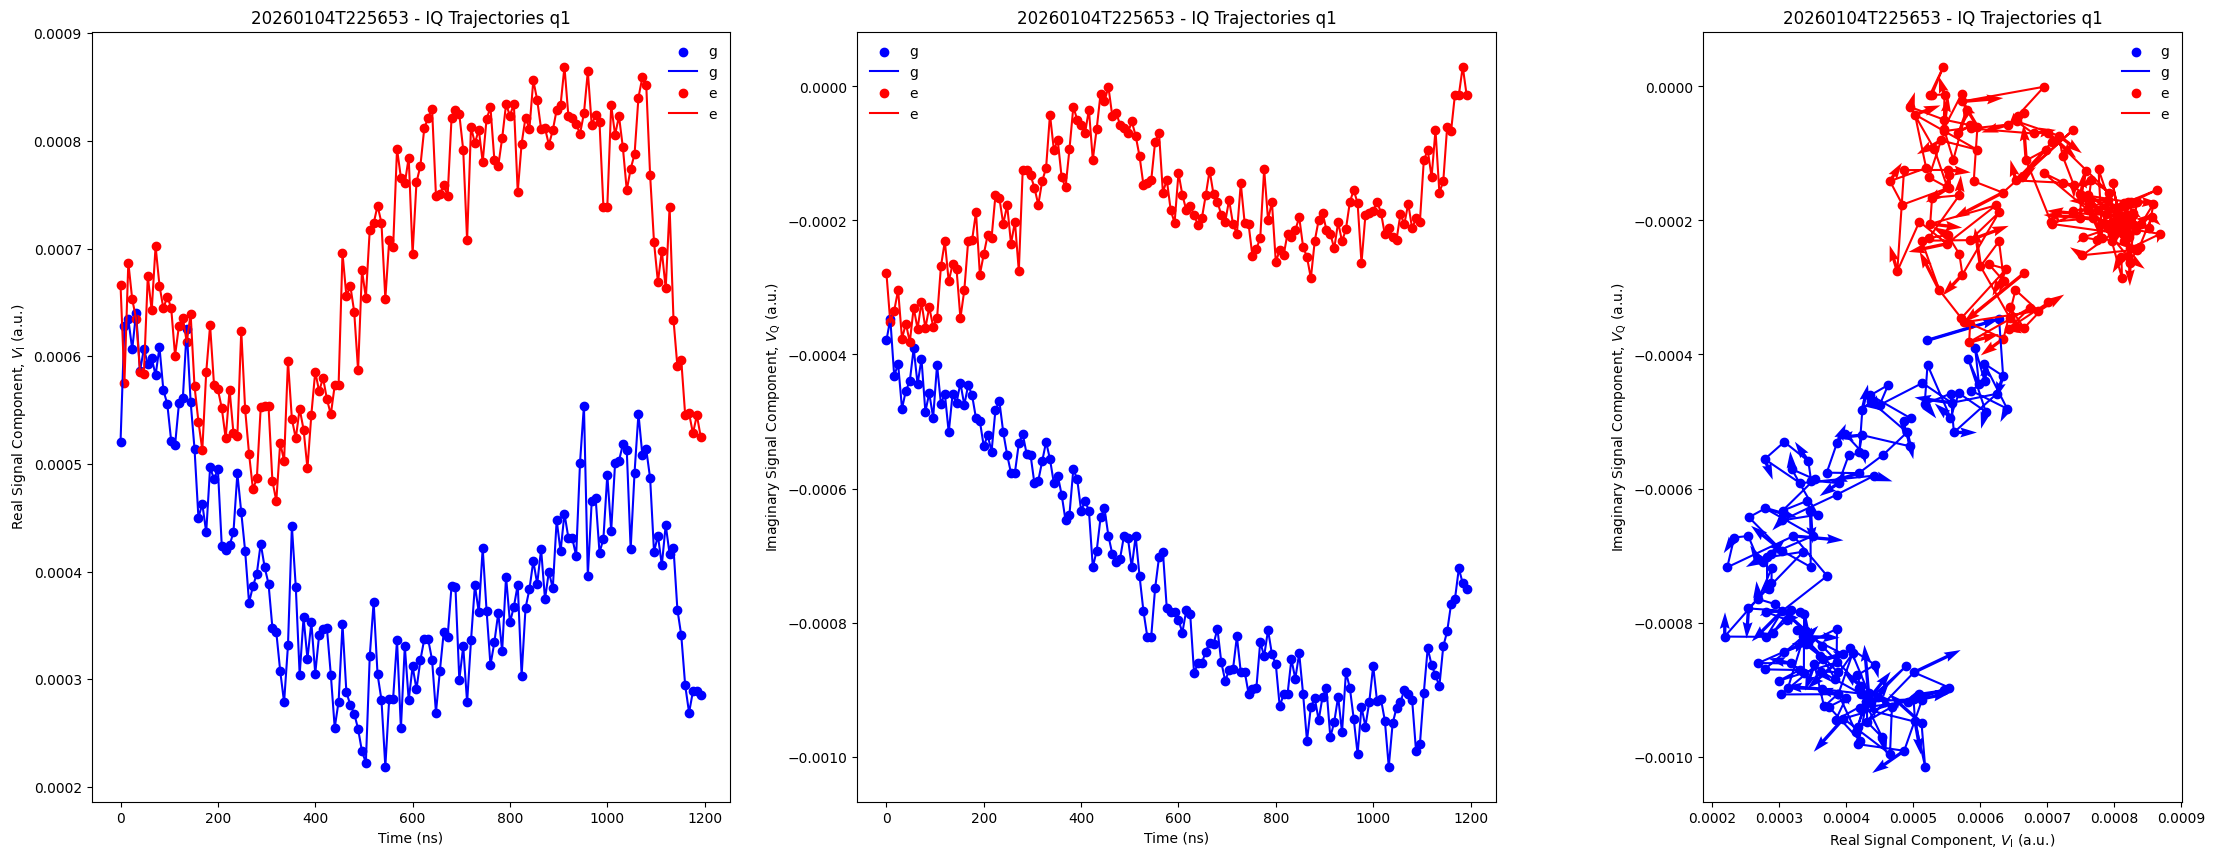

In [24]:
from experiments import iq_time_trace as iq_t

####################################################################################
q=qubits[1]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
temp_pars.readout_length = 1.2e-6
temp_pars.readout_integration_length = 0.6e-6
temp_pars.readout_integration_delay = 0.4e-6
temp_pars.readout_resonator_frequency = 7.236e9
temp_pars.readout_amplitude = 0.7
# temp_pars.readout_range_out = 15

temporary_parameters[q.uid] = temp_pars
#######################################################################
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")
pprint(q.readout_parameters())
#######################################################################
options = iq_t.experiment_workflow.options()
options.count(2**14)
options.do_analysis(True)


#print(workflow.show_fields(options))

###################################################################
iq_trace_wf = iq_t.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    options=options,
    states='ge',
    temporary_parameters=temporary_parameters
)

iq_traj_result = iq_trace_wf.run()
#qubit_spec_compiled = session.compile(amplitude_rabi.create_experiment(qpu=qpu,qubit=q,amplitudes=amplitudes, options=options))
iq_traj_result.tasks['analysis_workflow'].tasks['plot_iq_time_traces'].output[q.uid]

#### SAVING DATA


In [ ]:
# from laboneq.simple import save, load


# #save(obj=iq_traj_result.output, filename='traj_test')

# RDATA = load(filename='traj_test')


- For $2\mu s$ acquire we have  2000ns/0.5ns=4000 sample

# Time Trace

In [ ]:
qubits[0].readout_parameters()

In [ ]:
from laboneq_applications.experiments import time_traces

q=qubits[0]
temporary_parameters = {}
temp_pars =deepcopy(q.parameters)
# temp_pars.readout_amplitude = 0.4
# temp_pars.drive_lo_frequency = 4.6e9
# temp_pars.readout_length = 0.8e-6
# temp_pars.readout_integration_length=1e-6
temporary_parameters[q.uid] = temp_pars
#######################################################################
pprint(q.readout_parameters())
print(f"DRIVE range (dBm) : {q.parameters.drive_range}, READOUT range (dBm) : {q.parameters.readout_range_out}")

cf = 50e6
#######################################################################
options = time_traces.experiment_workflow.options()
options.update(False)
options.filter_kernels(True)
options.filter_cutoff_frequency(cf)
options.granularity(1)

#print(workflow.show_fields(options))

###################################################################
raw_trace = time_traces.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=q,
    options=options,
    states='ge',
    temporary_parameters=temporary_parameters
)

raw_trace_result = raw_trace.run()
raw_trace_analysis_result = raw_trace_result.tasks['analysis_workflow'].output
print(raw_trace_analysis_result)

In [ ]:
# from laboneq.simple import show_pulse_sheet
# from laboneq.contrib.example_helpers.plotting.plot_helpers import plot_simulation

# show_pulse_sheet(compiled_experiment=raw_trace_result.tasks["compile_experiment"].output,name='test', interactive=True)
# plot_simulation(compiled_experiment=raw_trace_result.tasks["compile_experiment"].output)

In [ ]:
import matplotlib.pyplot as plt
tr_t=raw_trace_result.tasks['analysis_workflow'].tasks['truncate_time_traces'].output
#raw_trace_result.tasks['analysis_workflow'].tasks['extract_kernels_thresholds'].output

r=tr_t["q2"]


plt.plot(r[2])

In [ ]:
import scipy as sp
krn=kernels
sos = sp.signal.butter(N=10, Wn=90e6,btype="lowpass", fs=2e9,output="sos")
fkrn=sp.signal.sosfiltfilt(sos, krn)

plt.plot(fkrn.real)
plt.plot(fkrn.imag)
# from analysis import time_traces
# time_traces.filter_integration_kernels(qubits=)



In [ ]:
raw_trace_result.tasks['analysis_workflow'].tasks["plot_kernels_fft"].output['q2']

In [ ]:
from laboneq_applications.analysis import time_traces
e_raw = raw_trace_result.output.data['q2']['result/e'].data
g_raw = raw_trace_result.output.data['q2']['result/g'].data

# Save Qubit Parameters

In [27]:
from helper import load_qubit_parameters, save_qubit_parameters
save_qubit_parameters(qubits={ qubit.uid : qubit for qubit in qubits}, save_folder="./qubit_parameters", filename="sample2")

Qubit parameters stored as JSON in /home/yalgaeahn/JSAHN/qubit-experiment/examples/selectiveRIP/qubit_parameters/20260104-2259_sample2.json
